In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('2020.21.LaLiga.Shot.csv')

In [5]:
df.head(10)

,h_team,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Alaves,400650,13,SavedShot,0.897,0.412,0.376995,Karim Benzema,a,2370,OpenPlay,2020,RightFoot,14968,Real Madrid,1,4,2021-01-23 20:00:00,Luka Modric,Throughball
1,Alaves,388300,87,BlockedShot,0.860,0.377,0.059505,Ximo Navarro,h,4052,OpenPlay,2020,RightFoot,14865,Valencia,2,2,2020-11-22 20:00:00,NaN,Rebound
2,Alaves,399857,77,MissedShots,0.909,0.419,0.133608,Joselu,h,866,OpenPlay,2020,Head,14960,Sevilla,1,2,2021-01-19 20:30:00,Rubén Duarte,Chipped
3,Alaves,378640,74,MissedShots,0.735,0.412,0.019165,Mauro Arambarri,a,3264,SetPiece,2020,RightFoot,14154,Getafe,0,0,2020-09-26 11:00:00,Marc Cucurella,Pass
4,Alaves,412957,60,BlockedShot,0.795,0.390,0.027720,Ximo Navarro,h,4052,OpenPlay,2020,RightFoot,15058,Celta Vigo,1,3,2021-04-04 12:00:00,NaN,None
5,Alaves,391072,79,SavedShot,0.877,0.469,0.074571,Willian José,a,2361,OpenPlay,2020,RightFoot,14891,Real Sociedad,0,0,2020-12-06 20:00:00,Portu,HeadPass
6,Alaves,400651,13,BlockedShot,0.959,0.371,0.314137,Karim Benzema,a,2370,OpenPlay,2020,RightFoot,14968,Real Madrid,1,4,2021-01-23 20:00:00,NaN,Rebound
7,Alaves,400655,40,Goal,0.848,0.460,0.101057,Karim Benzema,a,2370,OpenPlay,2020,RightFoot,14968,Real Madrid,1,4,2021-01-23 20:00:00,Eden Hazard,Pass
8,Alaves,400665,69,Goal,0.853,0.680,0.082703,Karim Benzema,a,2370,OpenPlay,2020,RightFoot,14968,Real Madrid,1,4,2021-01-23 20:00:00,Luka Modric,Chipped
9,Alaves,399851,44,BlockedShot,0.702,0.569,0.016015,Ximo Navarro,h,4052,OpenPlay,2020,RightFoot,14960,Sevilla,1,2,2021-01-19 20:30:00,Luis Rioja,Pass


In [6]:
#splitting the full name and then only storing the second name which we would like to show in our plot
df['player'] = df['player'].apply(lambda x: x.split(' ')[1] if(len(x.split(' '))>1) else x)
df['player']

0         Benzema
1         Navarro
2          Joselu
3       Arambarri
4         Navarro
          ...    
8123           de
8124        Barja
8125    Chukwueze
8126        Barja
8127       Parejo
Name: player, Length: 8128, dtype: object

In [7]:
teams = df['h_team'].unique().tolist()
teams

['Alaves',
 'Athletic Club',
 'Atletico Madrid',
 'Barcelona',
 'Cadiz',
 'Celta Vigo',
 'Eibar',
 'Elche',
 'Getafe',
 'Granada',
 'Levante',
 'Osasuna',
 'Real Betis',
 'Real Madrid',
 'Real Sociedad',
 'Real Valladolid',
 'SD Huesca',
 'Sevilla',
 'Valencia',
 'Villarreal']

<ipython-input-32-82a6a5dccf51>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
<ipython-input-32-82a6a5dccf51>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)


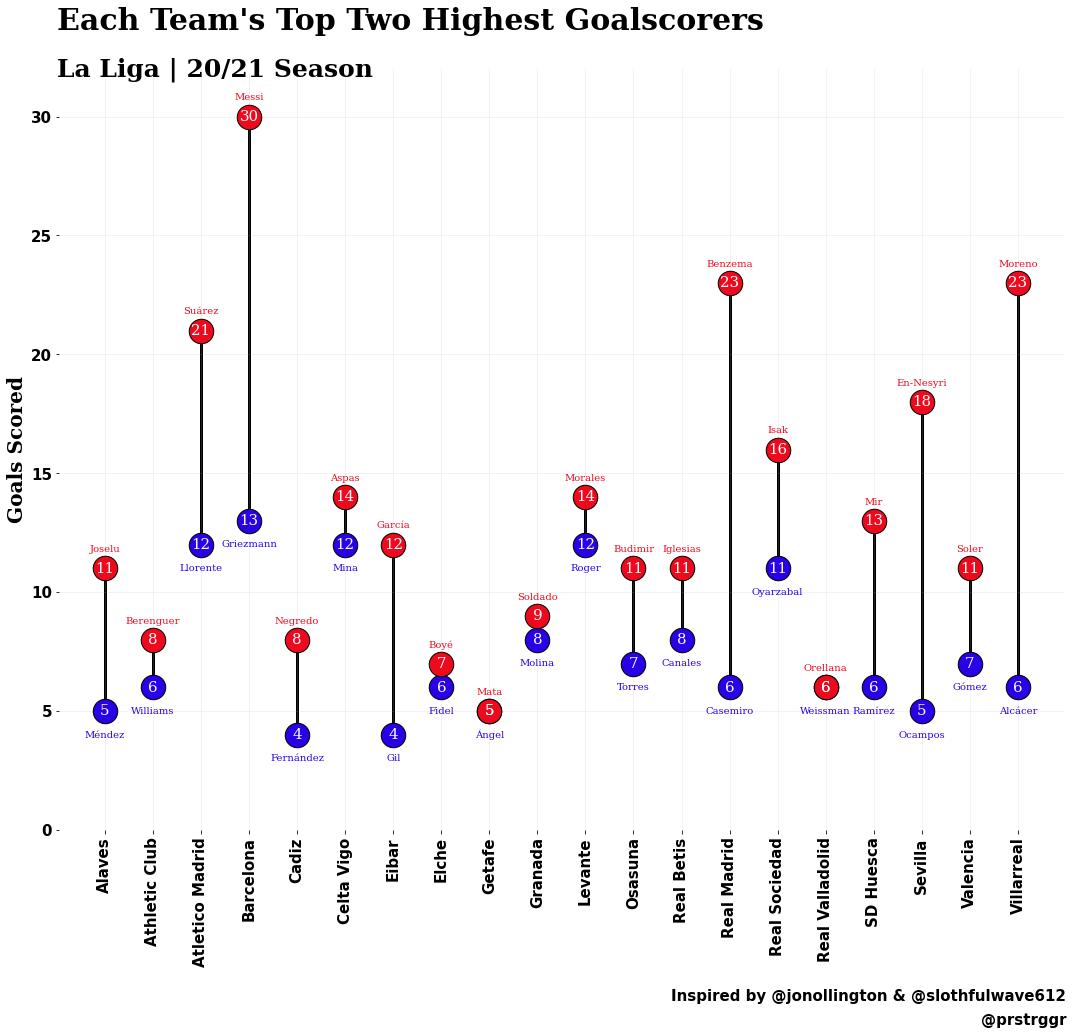

In [32]:
first_color = '#EE0A1D' #color for representing the top goalscorer
second_color = '#2901E7' #color for representing the second top goalscorer
goal_color = '#FAF9FF' #color for the number of goals text inside the circle
line_color = '#000000'
y_ticks = [0, 5, 10, 15, 20, 25, 30]
fig, ax = plt.subplots(figsize=(18, 14))
spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)
plt.ylabel('Goals Scored', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

for team in teams:
    home_matches = df[(df['h_team'] == team) & (df['h_a'] == 'h')]
    away_matches = df[(df['a_team'] == team) & (df['h_a'] == 'a')]
    team_df = pd.concat([home_matches, away_matches])
    #data manipulation to get the dataframe of a team's goalscorers sorted by the total number of goals
    topscorers = team_df[team_df['result'] == 'Goal'].groupby('player').agg({'result':'count'}).reset_index().sort_values(by='result', axis=0, ascending=False)
    
    ax.scatter(team, topscorers.iloc[0]['result'], c=first_color, s=600, zorder=3, ec=line_color)
    ax.scatter(team, topscorers.iloc[1]['result'], c=second_color, s=600, zorder=2, ec=line_color)
    ax.plot((team, team), (topscorers.iloc[0]['result'], topscorers.iloc[1]['result']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(team, topscorers.iloc[0]['result'], topscorers.iloc[0]['result'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[0]['result']+0.8, topscorers.iloc[0]['player'], c=first_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['result'], topscorers.iloc[1]['result'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['result']-1, topscorers.iloc[1]['player'], c=second_color, va='center', ha='center', fontsize=10, fontfamily='serif')

plt.ylim(0, 32)
ax.grid(which='both', alpha=0.2)
ax.text(-1, 34, "Each Team's Top Two Highest Goalscorers", c='#000000',ha='left', va='center', fontsize=30, fontfamily='serif', fontweight='bold')
ax.text(-1, 32, "La Liga | 20/21 Season", c='#000000', ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')

ax.text(20, -7, 'Inspired by @jonollington & @slothfulwave612', va='center', ha='right',fontweight='bold', size=15)
ax.text(20, -8, '@prstrggr', va='center', ha='right',fontweight='bold', size=15)

plt.savefig('dumbbell-chart.png', dpi=700, bbox_inches='tight')